<b> <h2> Hello, in this tutorial you will see how to get reviews from flipkart for a specific product and then saving them in a structured format</h2></b>

<h4> note that reviews need to be more than 10 </h4>

<h1><b><font color=blue>part 1 (how to simulate searching of product on google)</font></b></h1>

<h5>
so before we write the code, let us just picture about how we normally search for the product.<p></h5>

- So first, we will go to google.com, then in the search bar type the desired product and click on the search button. 

* Next, we will go and further explore by clicking on that product link which will take to an another page.

* For our case, we need to get the reviews so, we will scroll down and click on "get all reviews" button on the website.

<font color=red>so let us simulate the above case</font>

In [21]:
#To install other Python libraries or modules we need the “install” command and “pip” command to install the packages. 
#once all the modules are downloaded follow the code given below

import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
from IPython.display import clear_output
import time

#you need to insert the path for your chromedriver
#you can easily download this file from net!
driver = webdriver.Chrome("C:/Users/aksha/Downloads/chromedriver_win32/chromedriver.exe") #If necessary, define the chrome path explicitly

#this will show a blank chrome window opened
#now lets simulate

In [22]:
link="https://www.google.com"
driver.get(link) #to open the link just use the get command

#give your desired product as an input
product_name="samsung note 20 ultra"

time.sleep(3) #this will delay your execution time 
#note I have used so that you can observe the whole simulation on chrome

#next we need to insert the text(product_name) in the search bar of google.com
#to do this first identify the element

#so right click and press inspect
#to get html code for search bar you can press search bar and click inspect again
#and check what is the name="_" mentioned

#refer image given below

how to find the name of the element:

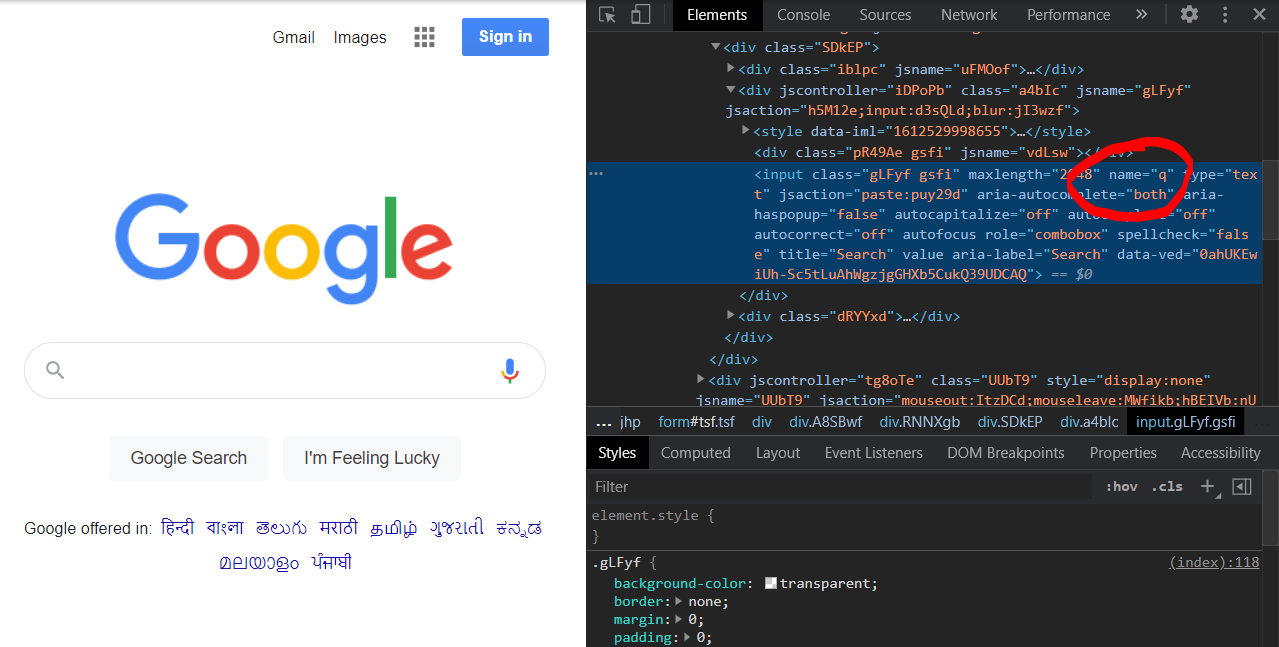

In [23]:
#so we found that the name of the element is "q"
a=driver.find_element_by_name('q') #find this element (refer images given below)
a.send_keys(product_name+" flipkart") #insert text in search box

#im adding "flipkart" to the product name string

time.sleep(2)

output: (for the above code)
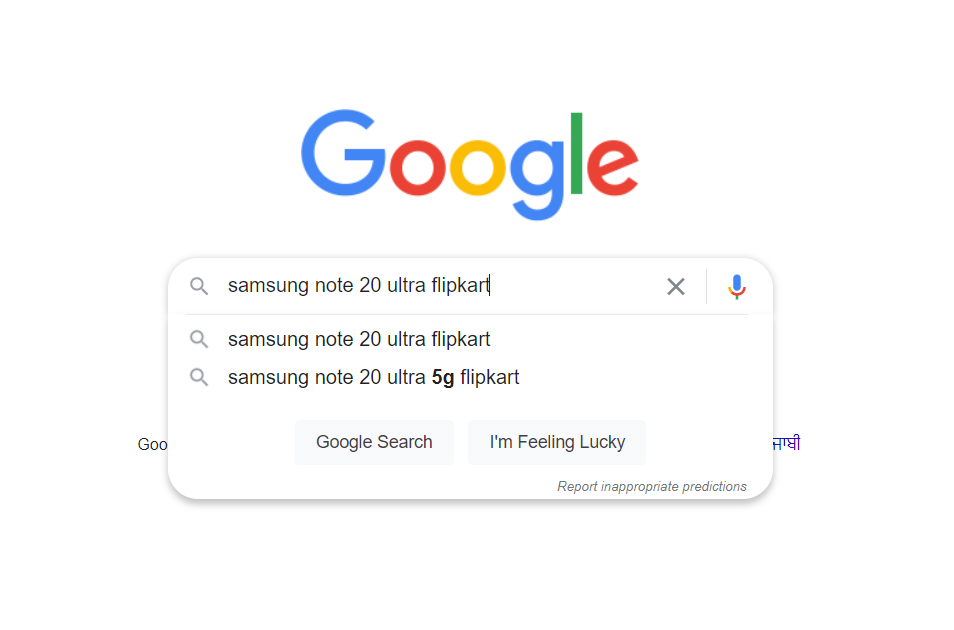

In [24]:
#similarly we will find what is the name of element for google search button
#follow same process as above (ie: inspect and find)


search_button = driver.find_element_by_name('btnK') #find element (search button)
search_button.click() #click on search button

output: (chrome will be simulated by searching for your text)
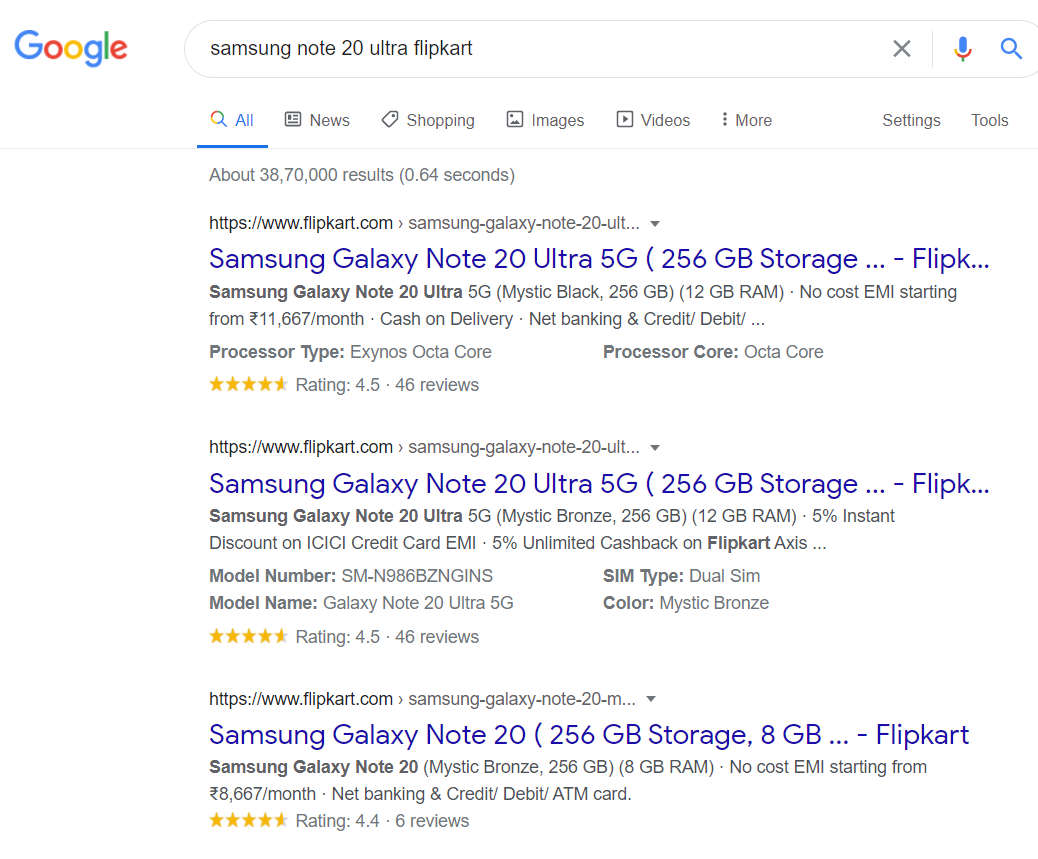

<h1><b><font color=blue>part 2 (how to go to a particular website and open reviews section)</font></b></h1>

now we will write a code to simulate selection of the very 1st link and once open...we will simulate scrolling to the review part and clicking it... to go the all reviews page

In [25]:
#note that we are using here find elements by class name
#this will return the multiple elements (since the 1st page has multiple elements using same class name)
#to access the 1st link we will consider the 0th element

time.sleep(2)

search_button1= driver.find_elements_by_class_name('DKV0Md') #find element
link1=search_button1[0] #0th element of the list
link1.click() #click on that link

output: you will be redirected to flipkart page of the product
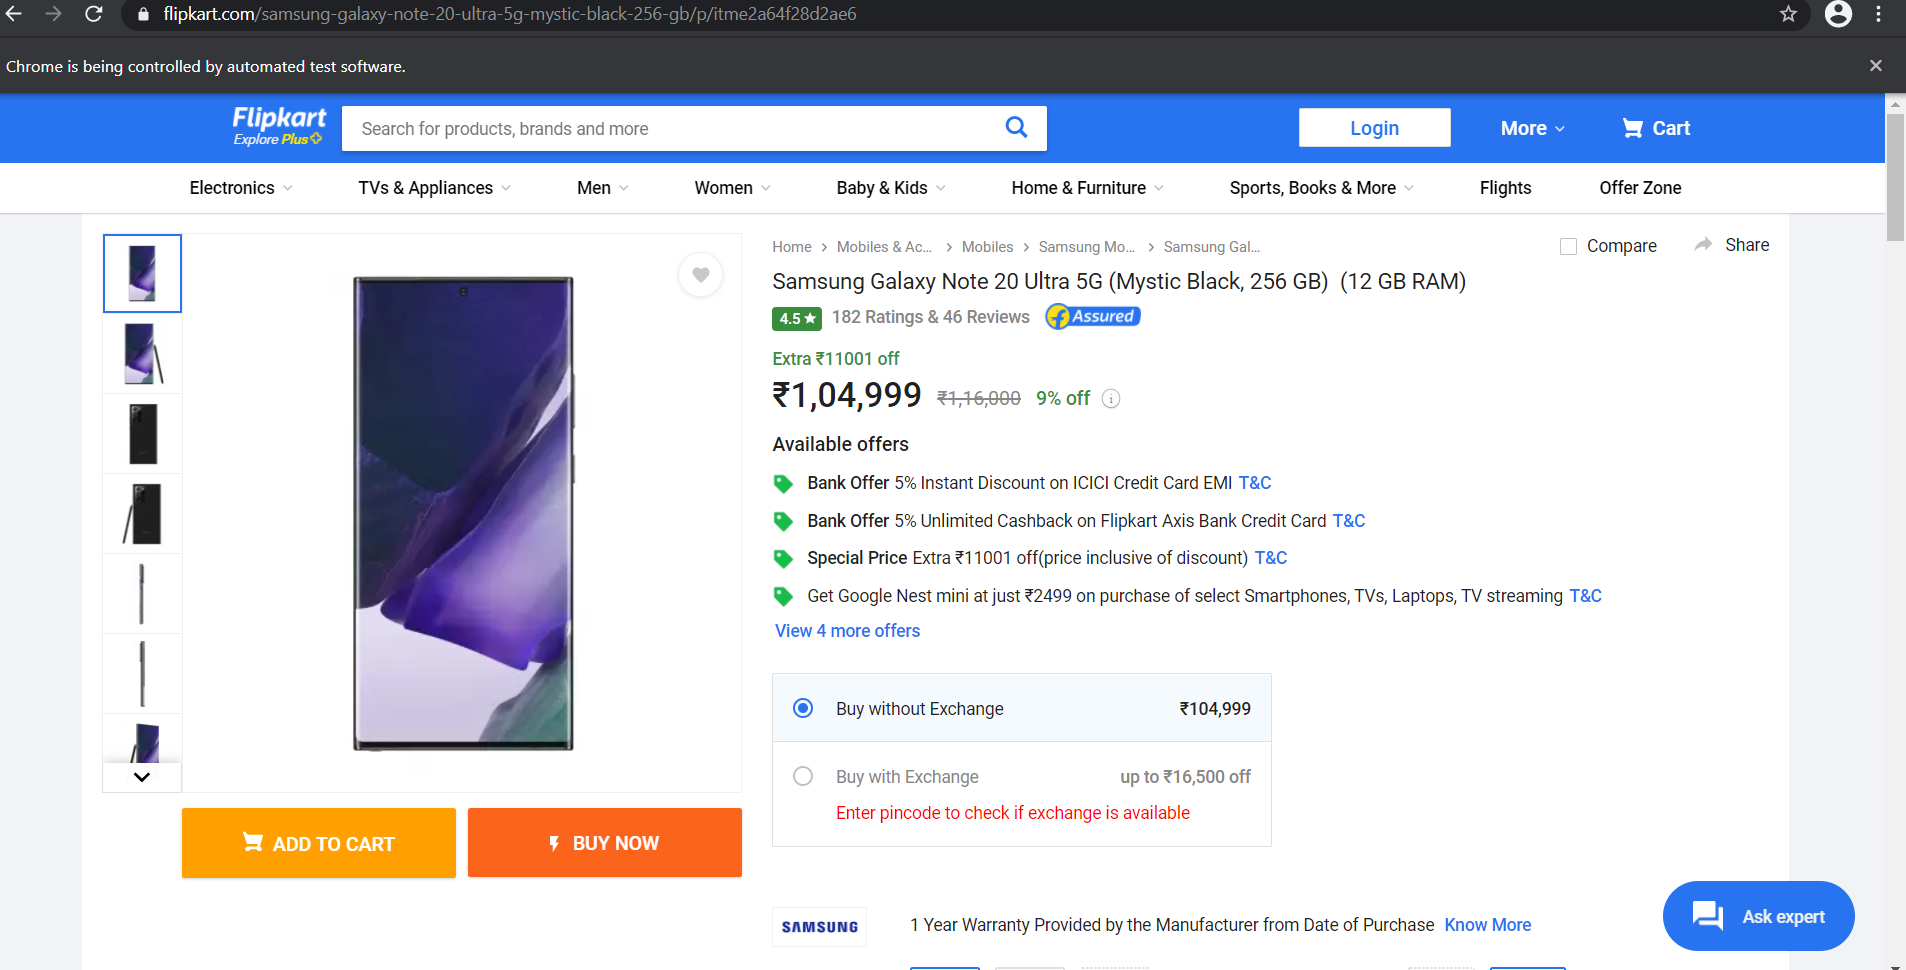
<br><br>

now if you scroll down you will see all reviews option which will redirect to review section
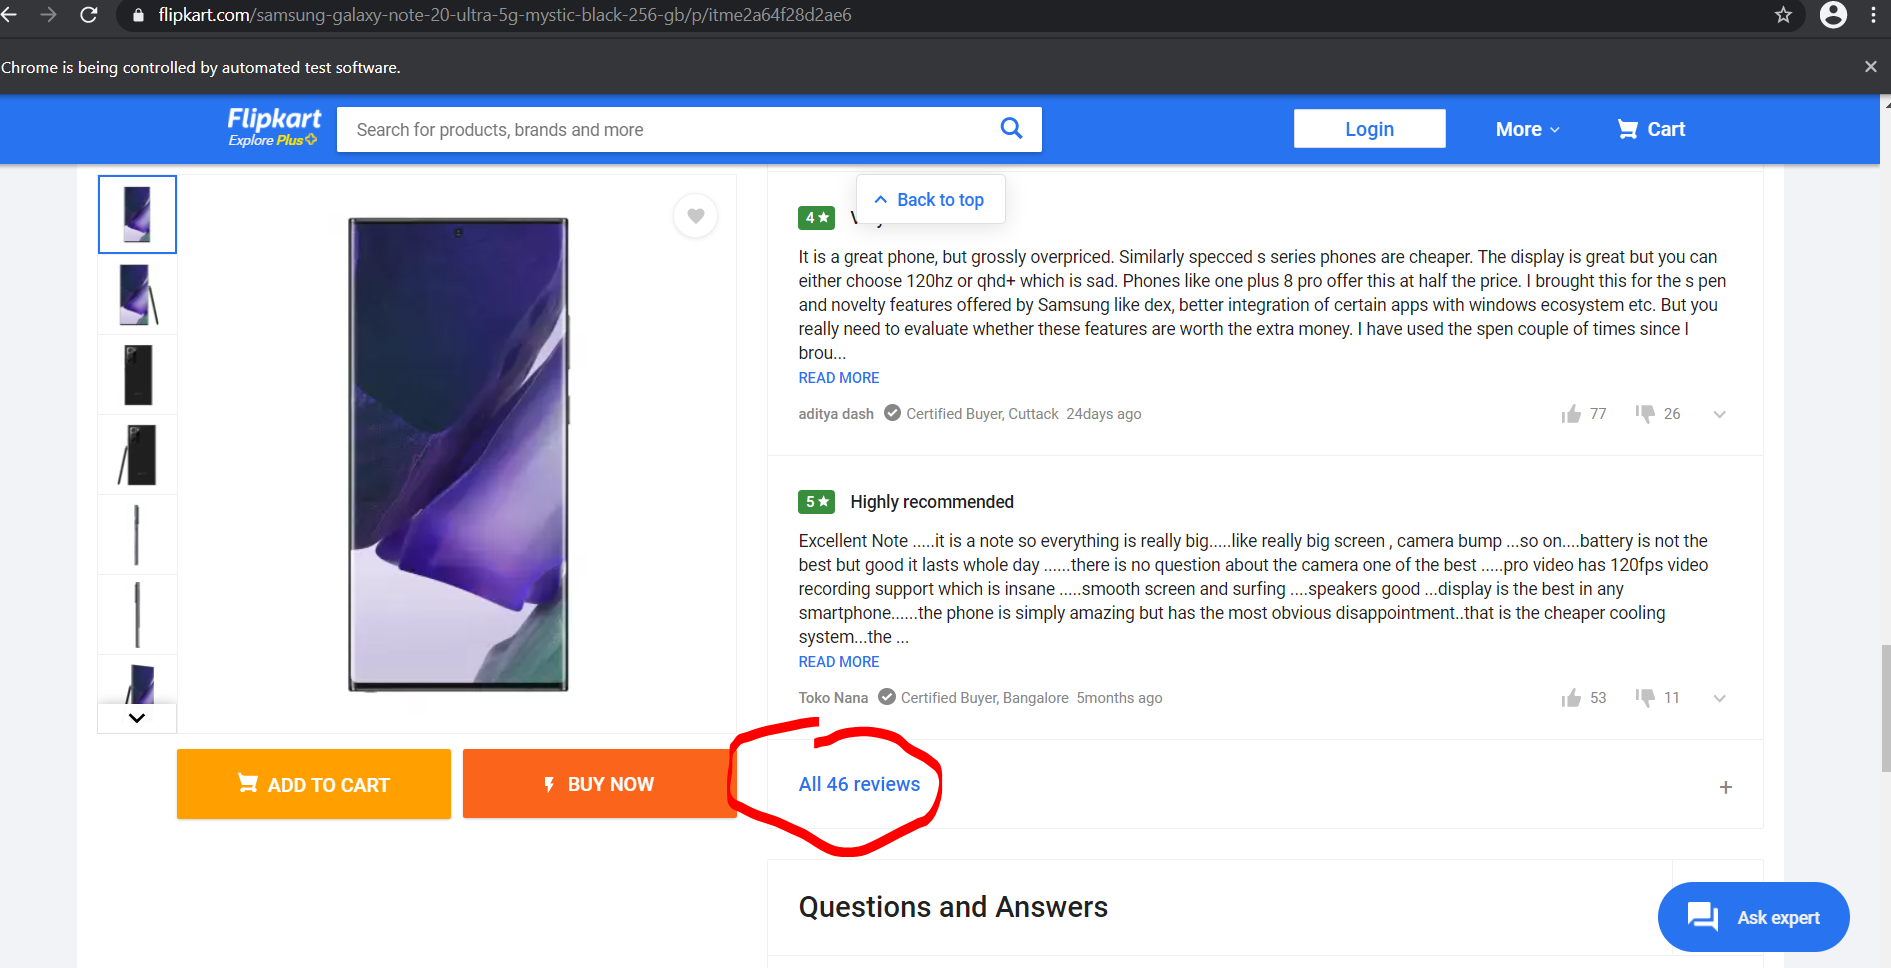

In [26]:
time.sleep(3)
review_button2= driver.find_element_by_class_name('_3UAT2v') #find element for all review
review_button2.click()

output: we will be redirected to review section of specific product
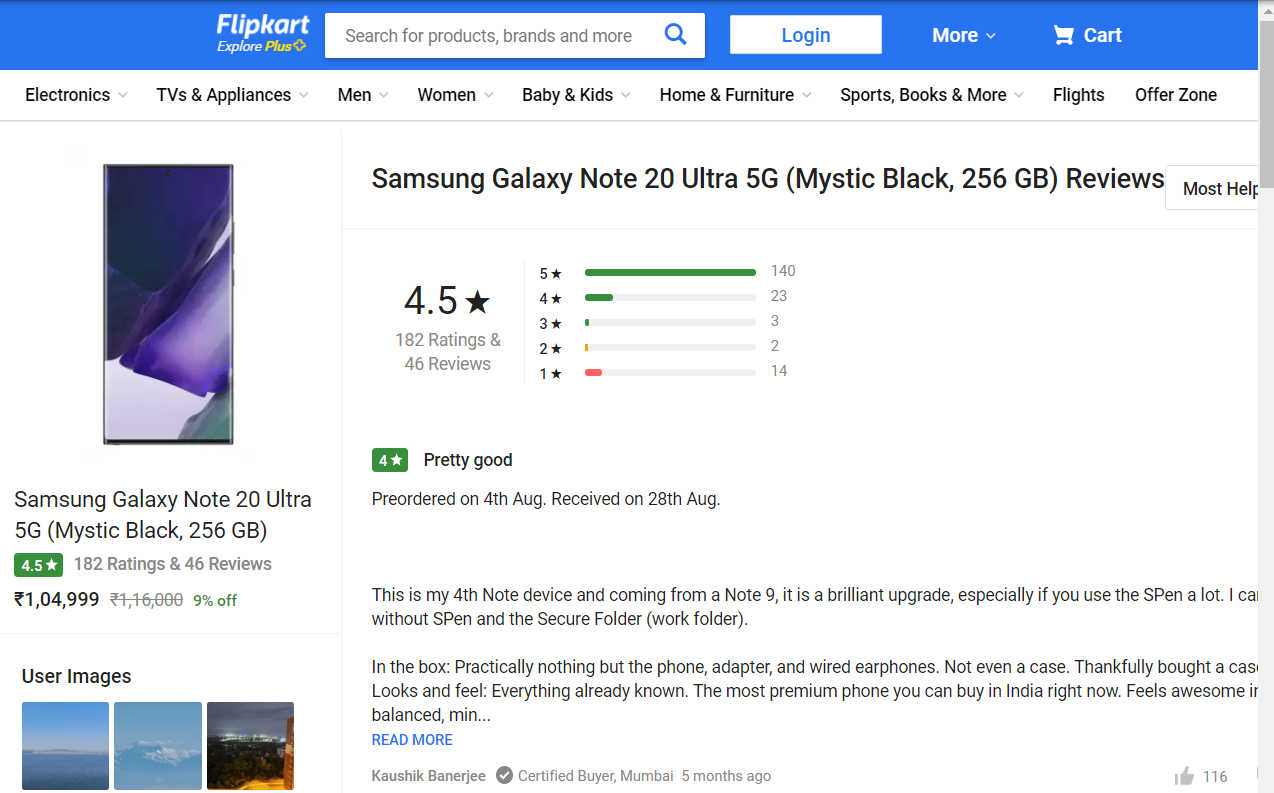

<h1><b><font color=blue>part 3 (get all the reviews)</font></b></h1>

now if you see the structure of the page you will notice that
* we need to click "READ MORE" button to read entire review (for eg in the above pic you can see read more option)
- so we need to take care that before scraping the reviews we need to click on read more option if it exist
- next, reviews are at different pages and not single 1 so we need to visit till the end to scrap entire data (image shown below)

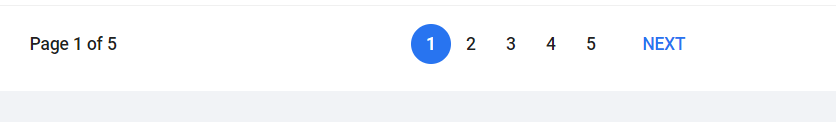

In [27]:
#first let us understand on how to read the rext from the website
#initially we are on 1st page so lets try...scraping text

time.sleep(3)
#while running code check chrome

#let us click readmore button which will enable us to get complete review when scraped
mg0=driver.find_elements_by_class_name('_1BWGvX') #read more button
for i in range(0,len(mg0)):
    mg0[i].click()

mg1=driver.find_elements_by_class_name('t-ZTKy') #reviews
mg2=driver.find_elements_by_class_name('_1BLPMq') #ratings
reviews=[]
ratings=[]
for i in range(0,len(mg1)):
    reviews.append(mg1[i].text)
    ratings.append(mg2[i].text)
    
#you can uncomment to see output of ratings and reviews of page 1

#print(ratings)
#print(reviews)

before pressing read more:
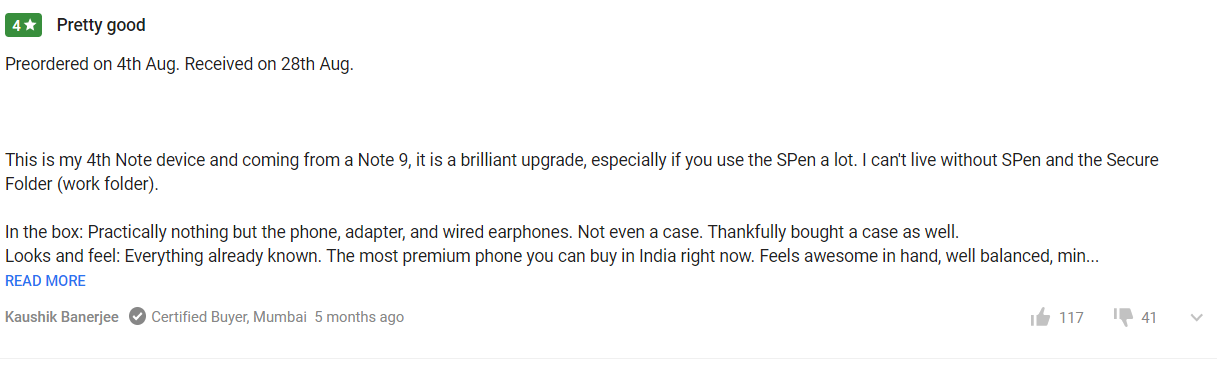

<br>

after simulating read more action
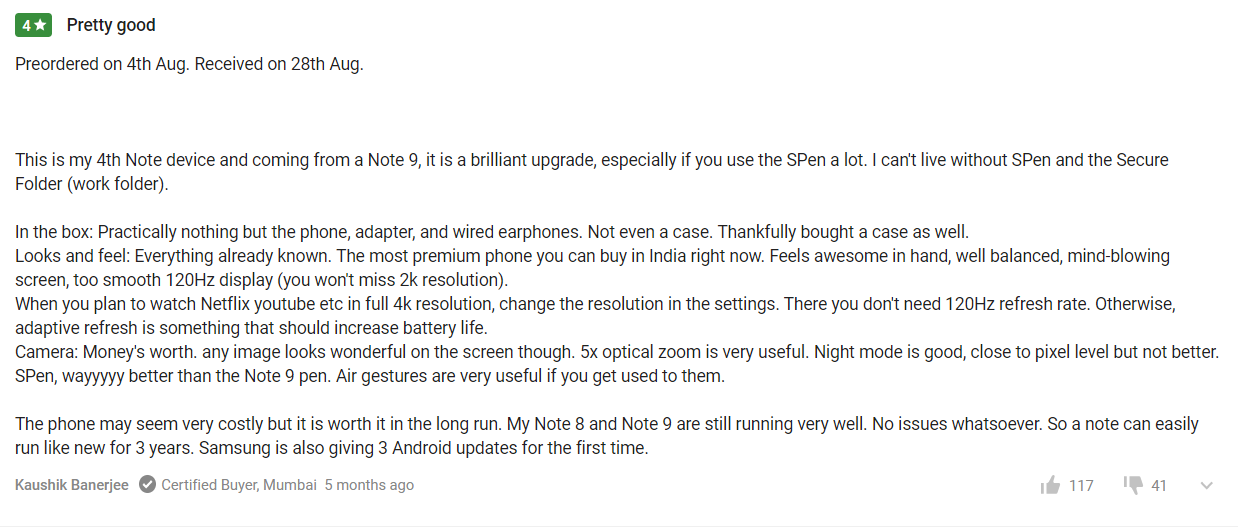

now to move from one page to another we need to understand few cases

* case 1: when you are on first page "_1LKTO3" element returns next
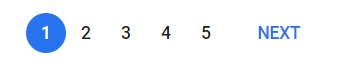
<br>

- case 2: when neither on first or last page "_1LKTO3" element returns next and previous
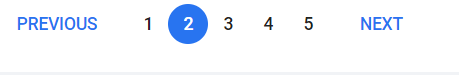
<br>

- case3 3: when on the last page "_1LKTO3" element returns previous
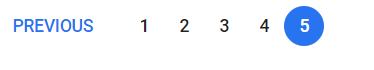

In [28]:
#since we have already scraped data from page 1 we can move to the next page
time.sleep(2)
#this follows case 1
driver.find_elements_by_class_name("_1LKTO3")[0].click() #list will only have 1 element

#now you will be redirected to page 2    

In [29]:
#we will use concept of loops to get through all the pages
#logic is that...while we have 2 elements...keep going next (case2)

count=2 #page count
time.sleep(3)
m=driver.find_elements_by_class_name("_1LKTO3")

while(len(m)==2):
    
    
    #same code as above to scarp
    time.sleep(3)
    #while running code check chrome

    #let us click readmore button which will enable us to get complete review when scraped
    mg0=driver.find_elements_by_class_name('_1BWGvX') #read more button
    for i in range(0,len(mg0)):
        mg0[i].click()

    mg1=driver.find_elements_by_class_name('t-ZTKy') #reviews
    mg2=driver.find_elements_by_class_name('_1BLPMq') #ratings

    for i in range(0,len(mg1)):
        
        #we will append to the list which we had already defined above
        reviews.append(mg1[i].text)
        ratings.append(mg2[i].text)
        
    m=driver.find_elements_by_class_name("_1LKTO3")
    if(len(m)==2):
        m[1].click() #go to next page, not now 0th element is previous
    print("page number", count)
    clear_output(wait=True) #to clear output
    count=count+1
    
print('done')

done


<h1><b><font color=blue>part 4 (saving all the reviews)</font></b></h1>

we will create a dataframe and save that to csv file

In [30]:
val = {'reviews': reviews,
       'ratings': ratings
        }

mydata = pd.DataFrame(val, columns = ['reviews','ratings'])

In [31]:
mydata.head() #top 5 items

,reviews,ratings
0,Preordered on 4th Aug. Received on 28th Aug.\n...,4
1,"It is a great phone, but grossly overpriced. S...",4
2,Excellent Note .....it is a note so everything...,5
3,This is the best Smartphone to purchase if you...,5
4,"I have always used the Galaxy S lineups, but t...",5


In [32]:
mydata.to_csv(r"C:\Users\aksha\Downloads\file1.csv",index=False) 
print('saved')

saved


<b> <h2>conclusion: there you go! You’ve learned how to automate and get reviews of product from flipkart</h2></b>

<h4> you can use this technique for any other websites, just by understanding the structure and elements used </h4>